In [23]:
!pip install -U ucimlrepo
!pip install -U seaborn==0.9.0


[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 208.1/208.1 kB 4.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from ucimlrepo import fetch_ucirepo
from datetime import datetime
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats 
from scipy import stats as stat
import numpy as np

In [1]:
# fetch dataset 
power_consumption_of_tetouan_city = fetch_ucirepo(id=849) 

# data (as pandas dataframes) 
X = power_consumption_of_tetouan_city.data.features 
y = power_consumption_of_tetouan_city.data.targets

#get the data from the dataset
data = power_consumption_of_tetouan_city.data.original

NameError: name 'fetch_ucirepo' is not defined

In [3]:
#none of the following values are above a z value of three
results = stat.zscore(data['Temperature'])
print(results.sort_values(ascending = False))
results = stat.zscore(data['Wind Speed'])
print(results.sort_values(ascending = False))
results = stat.zscore(data['Zone 1 Power Consumption'])
print(results.sort_values(ascending = False))
results = stat.zscore(data['Zone 2  Power Consumption'])
print(results.sort_values(ascending = False))
results = stat.zscore(data['Zone 3  Power Consumption'])
print(results.sort_values(ascending = False))
results = stat.zscore(data['general diffuse flows'])
print(results.sort_values(ascending = False))
results = stat.zscore(data['Humidity'])
print(results.sort_values(ascending = False))
results = stat.zscore(data['diffuse flows'])
print(results.sort_values(ascending = False))

#the next 23 elements are above the z value of three
results = stat.zscore(data['general diffuse flows'])
results = results.sort_values(ascending = False)[:24]
print(results)

#the next 1361 elements are above the z value of three
results = stat.zscore(data['diffuse flows'])
results = results.sort_values(ascending = False)[:1362]
print(results)

#the next 88 elements are above the z value of three
results = stat.zscore(data['Temperature'])
results = results.sort_values(ascending = False)[:89]
print(results)

#the next 656 elements are above the z value of three
results = stat.zscore(data['Zone 3  Power Consumption'])
results = results.sort_values(ascending = False)[:657]
print(results)

#the next 1 elements are above the z value of three
results = stat.zscore(data['Zone 2  Power Consumption'])
results = results.sort_values(ascending = False)[:2]
print(results)

29034    3.645476
29033    3.605926
29035    3.602487
29031    3.599048
29030    3.597328
           ...   
3494    -2.618559
3495    -2.623202
3486    -2.625610
3488    -2.642805
3487    -2.676165
Name: Temperature, Length: 52416, dtype: float64
42819    1.925849
42817    1.858582
42821    1.805364
42818    1.642305
42822    1.588236
           ...   
26927   -0.811673
26933   -0.811673
24123   -0.811673
26930   -0.811673
26928   -0.812950
Name: Wind Speed, Length: 52416, dtype: float64
31514    2.785140
31513    2.777071
31515    2.761829
31512    2.750174
31656    2.744795
           ...   
2064    -2.526877
2060    -2.560109
2063    -2.582264
2062    -2.583968
2061    -2.587377
Name: Zone 1 Power Consumption, Length: 52416, dtype: float64
29494    3.146518
29493    2.999772
30936    2.968476
30938    2.959706
30935    2.958244
           ...   
13145   -2.356115
13143   -2.382193
13142   -2.385717
13144   -2.394880
13141   -2.399813
Name: Zone 2  Power Consumption, Length: 52416, d

In [4]:
# metadata 
power_consumption_of_tetouan_city.metadata

{'uci_id': 849,
 'name': 'Power Consumption of Tetouan City',
 'repository_url': 'https://archive.ics.uci.edu/dataset/849/power+consumption+of+tetouan+city',
 'data_url': 'https://archive.ics.uci.edu/static/public/849/data.csv',
 'abstract': 'This dataset is related to power consumption of three different distribution networks of Tetouan city which is located in north Morocco.',
 'area': 'Social Science',
 'tasks': ['Regression'],
 'characteristics': ['Multivariate', 'Time-Series'],
 'num_instances': 52417,
 'num_features': 6,
 'feature_types': ['Real', 'Integer'],
 'demographics': [],
 'target_col': ['Zone 1 Power Consumption',
  'Zone 2  Power Consumption',
  'Zone 3  Power Consumption'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2018,
 'last_updated': 'Fri Mar 08 2024',
 'dataset_doi': '10.24432/C5B034',
 'creators': ['Abdulwahed Salam', 'Abdelaaziz El Hibaoui'],
 'intro_paper': {'title': 'Comparison of Machine Lear

In [5]:
# variable information 
power_consumption_of_tetouan_city.variables

,name,role,type,demographic,description,units,missing_values
0,DateTime,Feature,Date,None,Each ten minutes,None,no
1,Temperature,Feature,Continuous,None,Weather Temperature of Tetouan city,None,no
2,Humidity,Feature,Continuous,None,Weather Humidity of Tetouan city,None,no
3,Wind Speed,Feature,Continuous,None,Wind speed of Tetouan city,None,no
4,general diffuse flows,Feature,Continuous,None,general diffuse flows,None,no
5,diffuse flows,Feature,Continuous,None,diffuse flows,None,no
6,Zone 1 Power Consumption,Target,Continuous,None,power consumption of zone 1 of Tetouan city,None,no
7,Zone 2 Power Consumption,Target,Continuous,None,power consumption of zone 2 of Tetouan city,None,no
8,Zone 3 Power Consumption,Target,Continuous,None,power consumption of zone 3 of Tetouan city,None,no


In [6]:
#get statistics for the feature
data.quantile([0.01, 0.25, 0.5, 0.75, 0.99])

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0.01,6.7636,27.3315,0.066,0.0220,0.059,20274.814839,11631.696184,7726.265060
0.25,14.4100,58.3100,0.078,0.0620,0.122,26310.668692,16980.766032,13129.326630
0.50,18.7800,69.8600,0.086,5.0355,4.456,32265.920340,20823.168405,16415.117470
0.75,22.8900,81.4000,4.915,319.6000,101.000,37309.018185,24713.717520,21624.100420
0.99,33.1585,92.0000,4.928,885.0000,596.800,48099.484232,33734.949373,38722.443515


In [7]:
data.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [8]:
#check data for null values
data.isnull().sum()

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

In [9]:
#transform time variables
data['DateTime'] = pd.to_datetime(data['DateTime'], format = "%m/%d/%Y %H:%M")

#find the entries along the corresponding dates
dataOne = data.loc[(data['DateTime'] >= '2017-01-02 00:00') & (data['DateTime'] < '2017-01-02 23:50')]

#find the entries along the corresponding dates
dataTwo = data.loc[(data['DateTime'] >= '2017-01-04 00:00') & (data['DateTime'] < '2017-01-04 23:50')]

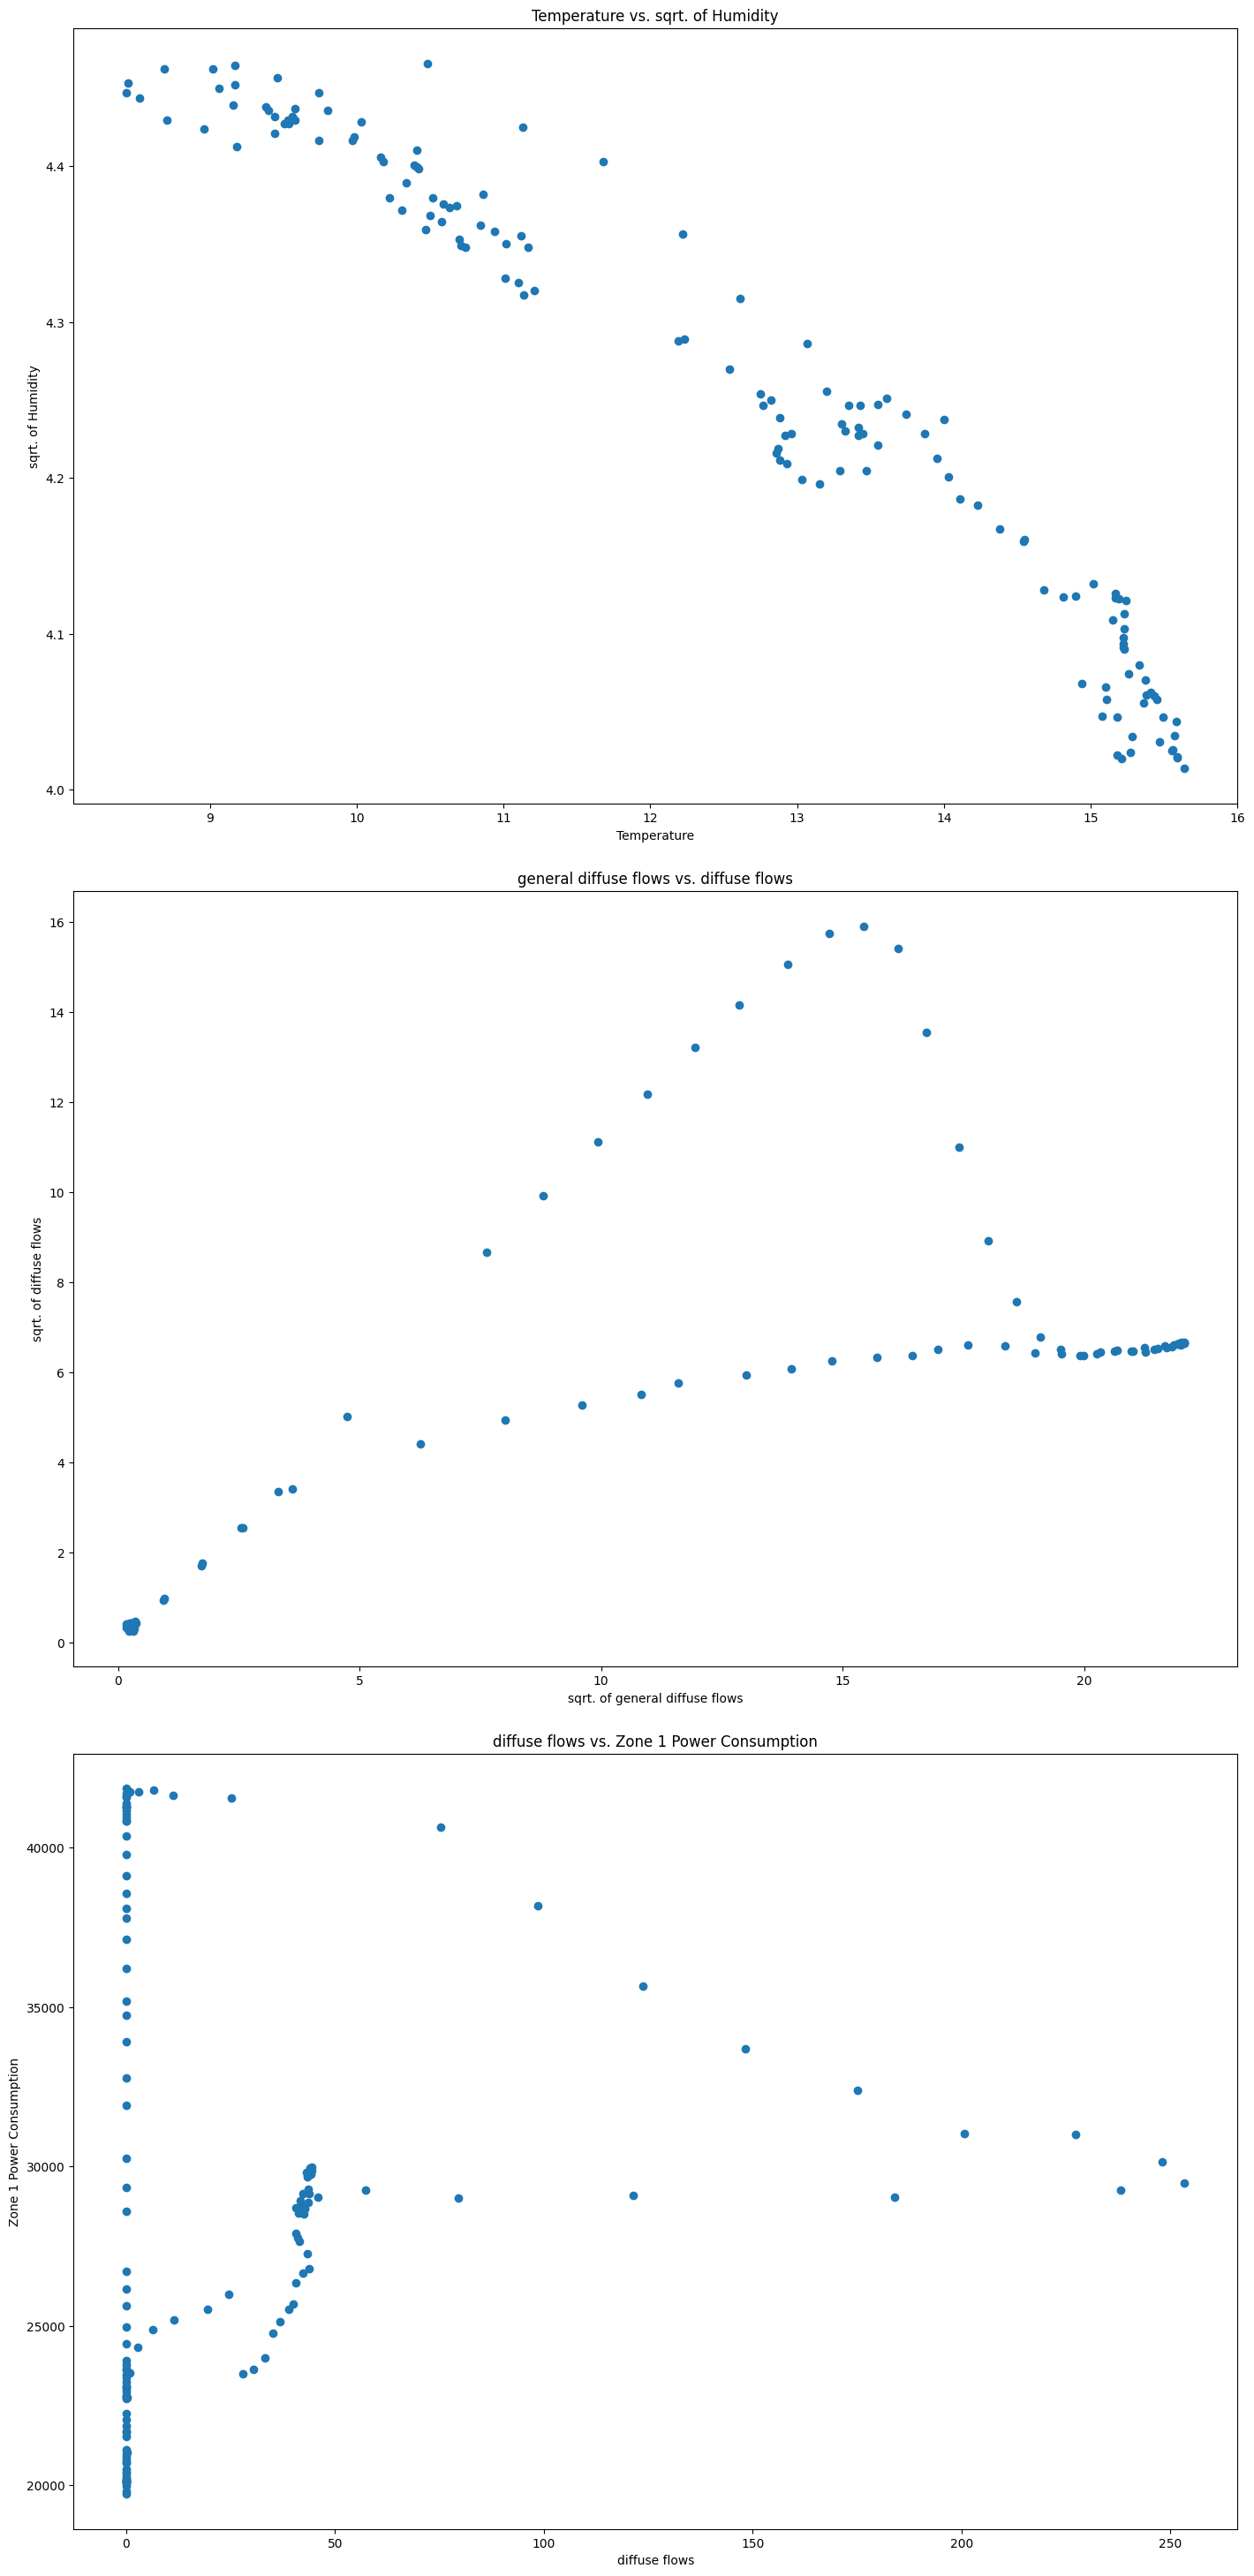

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 30))
fig.tight_layout(pad=5.0)

ax1.scatter((dataOne['Temperature']), np.log(dataOne['Humidity']))
ax1.set(xlabel = 'Temperature', ylabel = 'sqrt. of Humidity', title = 'Temperature vs. sqrt. of Humidity');

ax2.scatter(np.sqrt(dataOne['general diffuse flows']), np.sqrt(dataOne['diffuse flows']))
ax2.set(xlabel = 'sqrt. of general diffuse flows', ylabel = 'sqrt. of diffuse flows', title = 'general diffuse flows vs. diffuse flows');

ax3.scatter(dataOne['diffuse flows'], dataOne['Zone 1 Power Consumption'])
ax3.set(xlabel = 'diffuse flows', ylabel = 'Zone 1 Power Consumption', title = 'diffuse flows vs. Zone 1 Power Consumption');

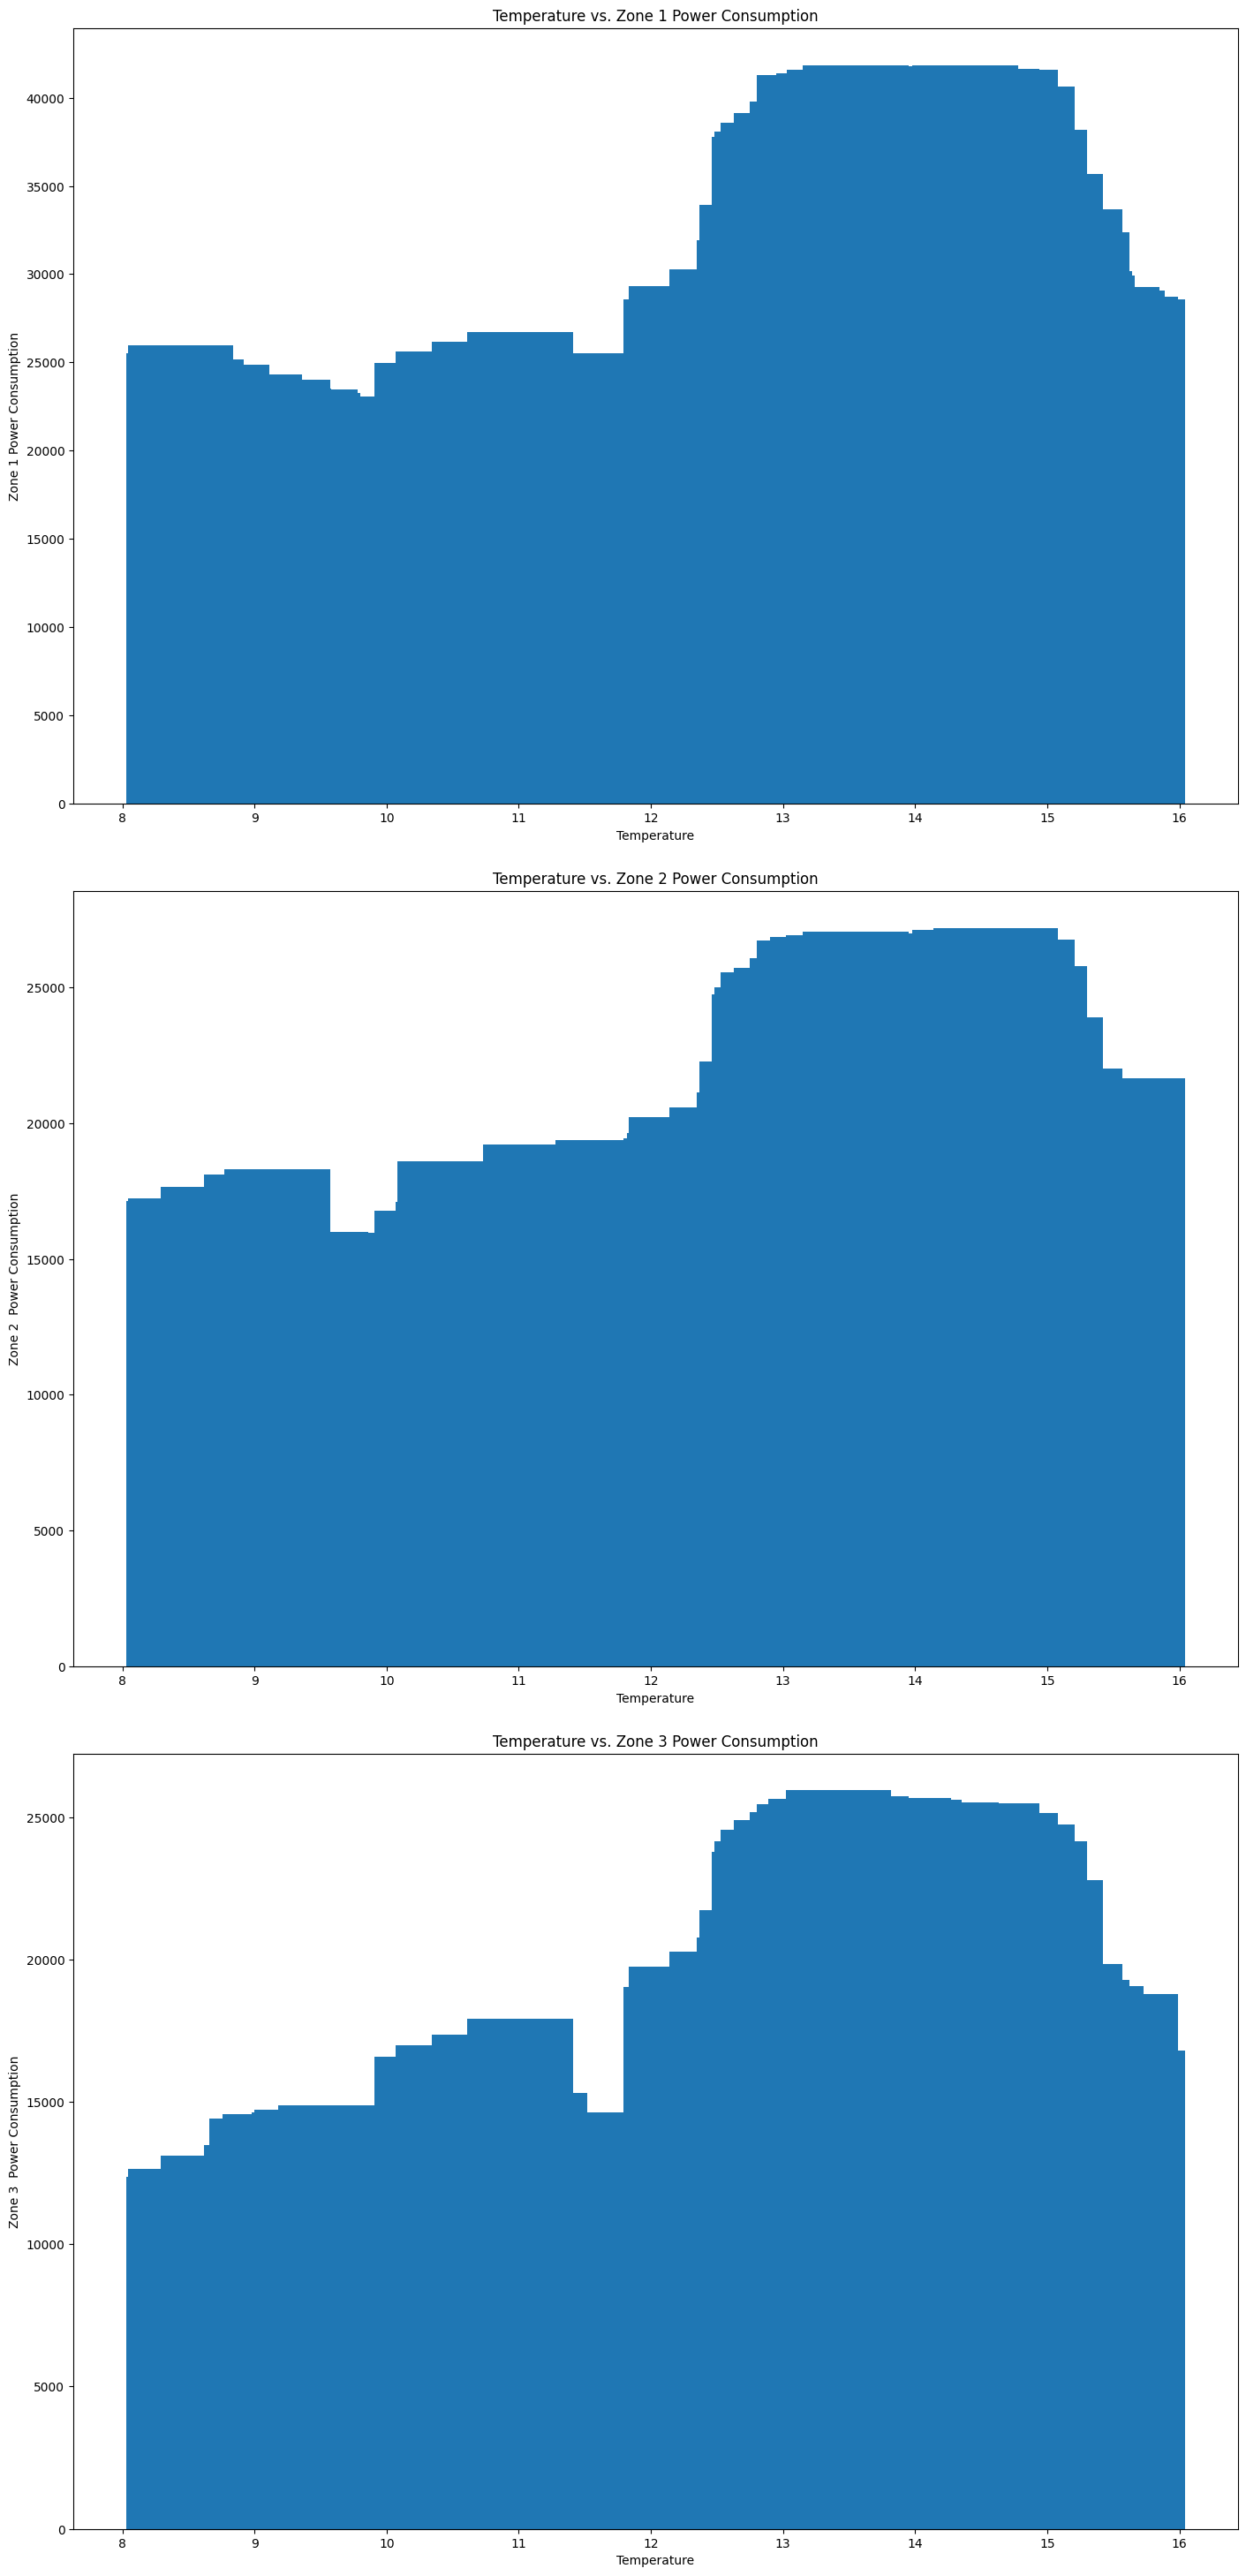

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 30))
fig.tight_layout(pad=5.0)

ax1.bar(dataOne['Temperature'], dataOne['Zone 1 Power Consumption'])
ax1.set(xlabel = 'Temperature', ylabel = 'Zone 1 Power Consumption', title = 'Temperature vs. Zone 1 Power Consumption');

ax2.bar(dataOne['Temperature'], dataOne['Zone 2  Power Consumption'])
ax2.set(xlabel = 'Temperature', ylabel = 'Zone 2  Power Consumption', title = 'Temperature vs. Zone 2 Power Consumption');

ax3.bar(dataOne['Temperature'], dataOne['Zone 3  Power Consumption'])
ax3.set(xlabel = 'Temperature', ylabel = 'Zone 3  Power Consumption', title = 'Temperature vs. Zone 3 Power Consumption');

In [12]:
#check data column names
dataOne.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

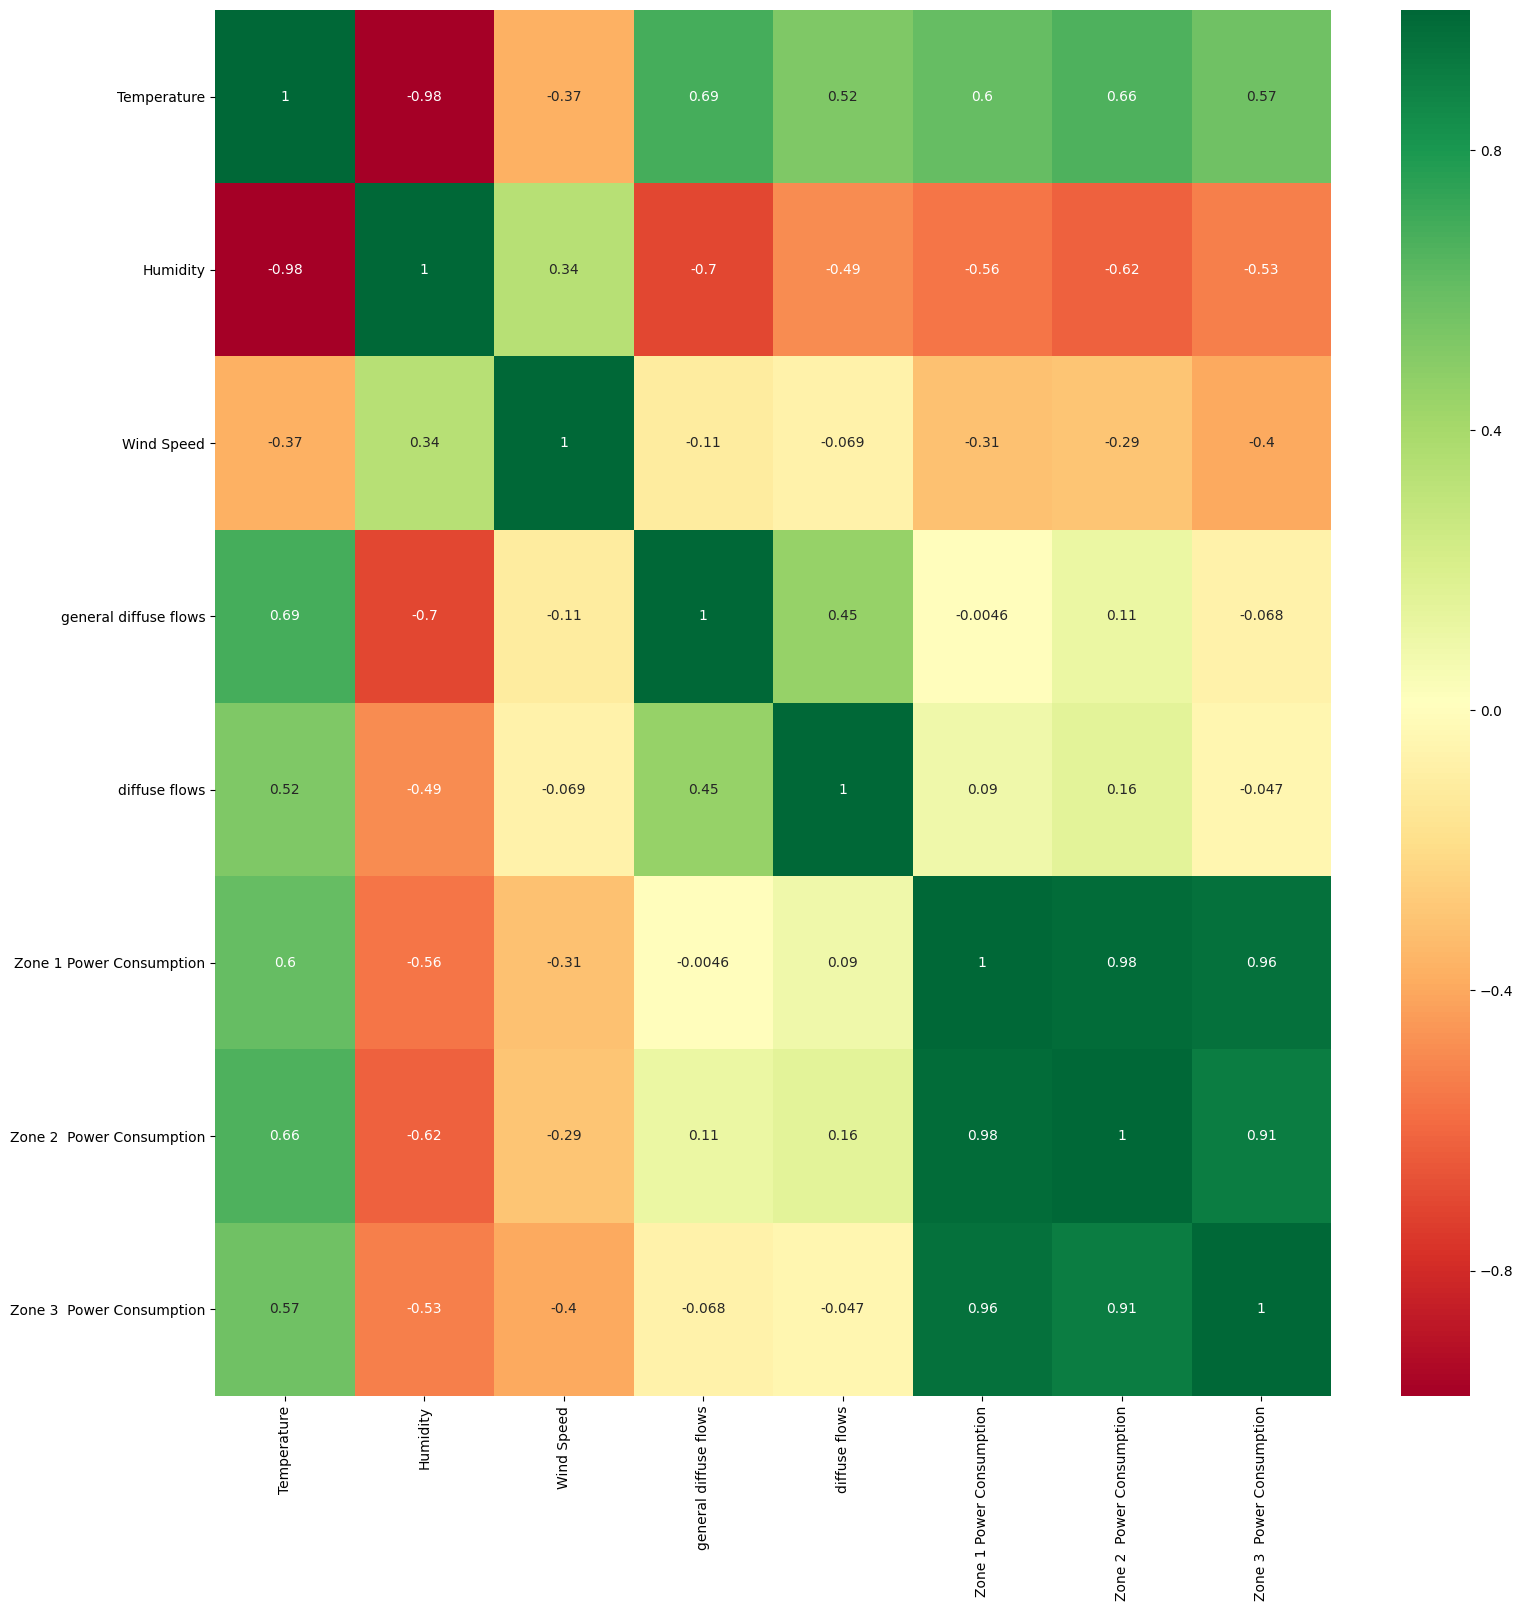

In [13]:
#plot the heatmap diagram wtih the given settings
plt.figure(figsize=(18,18))
sns.heatmap(dataOne.corr(),annot=True,cmap='RdYlGn')

#show the heatmap
plt.show()

In [14]:
#set a threshold of 0.05
alpha=0.05

#transform time variables
data['DateTime'] = pd.to_datetime(data['DateTime'], format = "%m/%d/%Y %H:%M")

#find the entries along the corresponding dates
dataOne = data.loc[(data['DateTime'] >= '2017-01-02 00:00') & (data['DateTime'] < '2017-01-02 23:50')]

#find the entries along the corresponding dates
dataTwo = data.loc[(data['DateTime'] >= '2017-01-07 00:00') & (data['DateTime'] < '2017-01-07 23:50')]

#check if there are differences between diffuse 
t_value1, p_value1 = stats.ttest_ind(dataOne['Zone 1 Power Consumption'], dataTwo['Zone 1 Power Consumption'])
print("t_value1 = ", t_value1, ", p_value1 = ", p_value1)

if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no difference between power consumption levels.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is a a difference between power consumption levels.")

t_value1 =  -2.167448295153121 , p_value1 =  0.031031563896130217
Conclusion: since p_value 0.031031563896130217 is less than alpha 0.05 
Reject the null hypothesis that there is no difference between power consumption levels.
